# Modelling

In [1]:
# Importare le librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer 


# Caricare il dataset
data_path = '../data/winemag-data-130k-v2.csv'  # Modificare il percorso se necessario
df = pd.read_csv(data_path)

df = df[~df['variety'].str.contains('Blend', case=False, na=False)]  # Rimuovere i blend
variety_counts = df['variety'].value_counts()

support_threshold = 0.006*len(df)  # Set the support threshold as desired

selected_varieties = variety_counts[variety_counts >= support_threshold]

filtered_df = df[df['variety'].isin(selected_varieties.index)]
df = filtered_df

# Preprocess description
from vinum_analytica.data import TextPreprocessor # type: ignore
preprocessor = TextPreprocessor()
df['description'] = df['description'].apply(preprocessor.preprocess)


[nltk_data] Downloading package stopwords to /home/paolo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/paolo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/paolo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df['description'], df['variety'], test_size=0.3, random_state=42)

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on the train set
X_train = vectorizer.fit_transform(X_train)

# Transform the test set
X_test = vectorizer.transform(X_test)

# Oversample the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Train a DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.set_params(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

In [3]:

clf.score(X_test, y_test)

/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

0.5909304511278195

In [4]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

                    precision    recall  f1-score   support

           Barbera       0.57      0.61      0.59       225
    Cabernet Franc       0.40      0.46      0.43       382
Cabernet Sauvignon       0.61      0.59      0.60      2804
        Chardonnay       0.71      0.69      0.70      3486
             Gamay       0.39      0.45      0.42       303
    Gewürztraminer       0.52      0.54      0.53       286
             Glera       0.79      0.68      0.73       203
          Grenache       0.37      0.37      0.37       206
  Grüner Veltliner       0.55      0.64      0.59       380
            Malbec       0.52      0.52      0.52       800
            Merlot       0.50      0.48      0.49       967
          Nebbiolo       0.64      0.65      0.65       797
      Petite Sirah       0.44      0.41      0.42       230
      Pinot Grigio       0.52      0.56      0.54       348
        Pinot Gris       0.44      0.48      0.46       409
        Pinot Noir       0.69      0.65

/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

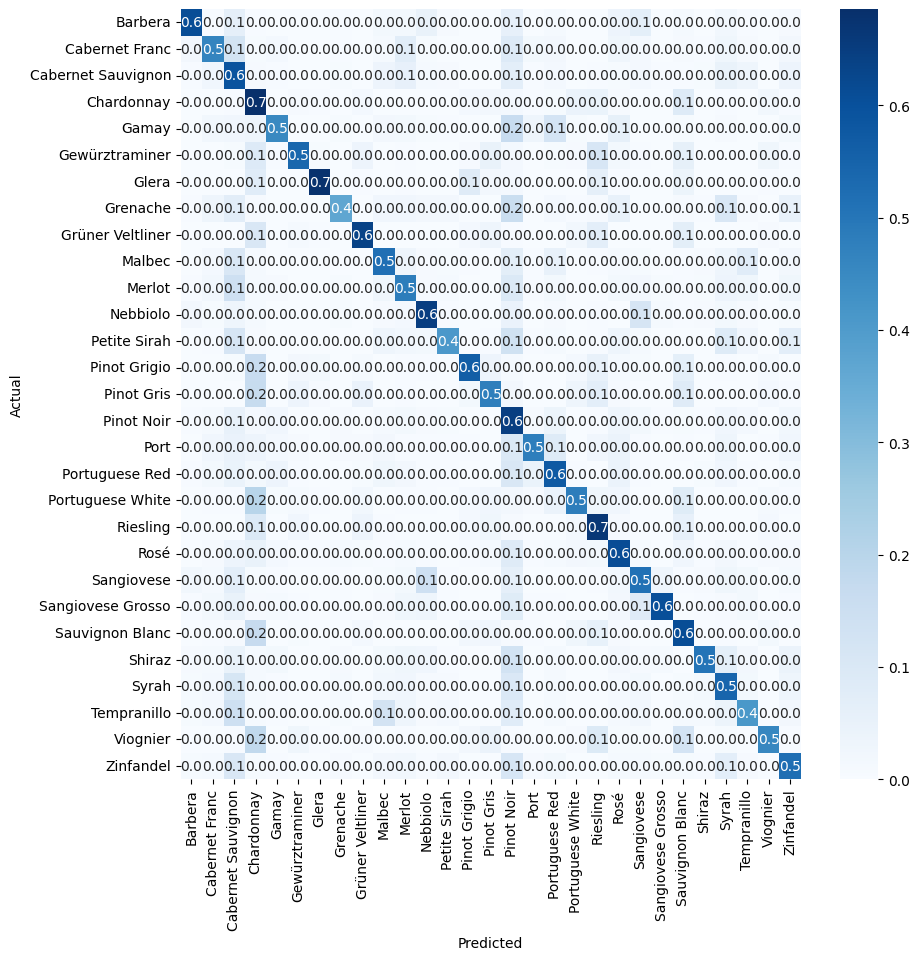

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='.1f', xticklabels=clf.classes_, yticklabels=clf.classes_, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [7]:
from sklearn import tree

tree.plot_tree(clf)

[Text(0.9980176955058603, 0.9973958333333334, 'x[2452] <= 0.0\ngini = 0.966\nsamples = 266394\nvalue = [9186, 9186, 9186, 9186, 9186, 9186, 9186, 9186, 9186\n9186, 9186, 9186, 9186, 9186, 9186, 9186, 9186, 9186\n9186, 9186, 9186, 9186, 9186, 9186, 9186, 9186, 9186\n9186, 9186]'),
 Text(0.9965690668267699, 0.9921875, 'x[16849] <= 0.0\ngini = 0.965\nsamples = 259383\nvalue = [9186, 9186, 9186, 9186, 9186, 9186, 9186, 9186, 9186\n9186, 9178, 9186, 9186, 9186, 9186, 9186, 9186, 9186\n9186, 9186, 9186, 8821, 2548, 9186, 9186, 9186, 9186\n9186, 9186]'),
 Text(0.9944517971982771, 0.9869791666666666, 'x[15686] <= 0.0\ngini = 0.964\nsamples = 253169\nvalue = [9186, 9186, 9185, 9186, 9186, 9186, 9186, 9166, 9186\n9186, 9168, 9186, 9186, 9186, 9186, 9185, 9186, 9149\n9186, 9186, 9142, 8814, 2548, 9186, 3133, 9149, 9186\n9186, 9182]'),
 Text(0.9913051355642774, 0.9817708333333334, 'x[8334] <= 0.0\ngini = 0.964\nsamples = 247976\nvalue = [9186, 9152, 9185, 9180, 9186, 9148, 9186, 9166, 9176\n9186, 

Error in callback <function flush_figures at 0x7f92cdce1300> (for post_execute):


KeyboardInterrupt: 